In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import linprog
import numpy as np

# Load the DataFrame
df = pd.read_csv("data-2 - copia.csv").dropna()

# Preprocess DataFrame
grouped = df.groupby('StockCode').agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).reset_index()
grouped.columns = ['Product', 'Demand', 'Price']

# Adding day-based features to the dataset
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Aggregate data by StockCode and day of the week
grouped_by_day = df.groupby(['StockCode', 'DayOfWeek']).agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'IsWeekend': 'mean'
}).reset_index()

grouped_by_day.columns = ['Product', 'DayOfWeek', 'Demand', 'Price', 'IsWeekend']

# Track results for each day and product

# Add cost and competitor price
base_prices_day = grouped_by_day['Price'].values
base_demand_day = grouped_by_day['Demand'].values
grouped_by_day['Cost'] = grouped_by_day['Price'] * 0.2
grouped_by_day['Competitor'] = np.maximum(grouped_by_day['Demand'] * 0.02 + 10, grouped_by_day['Cost'] + 1.5)

# Adjusting parameters for daily pricing
iterations = 50  # Allow more iterations for thorough adjustments
alpha = 0.1
epsilon = 0.02  # Further reduced for stability
beta = 0.005  # Further reduced for competitor adjustment damping

# Track results for each day and product
results_daily = []
ingresos_per_iteration_daily = []

# Convergence threshold
convergence_threshold = 1e-4  # Stricter threshold for convergence
previous_ingresos = 0

In [6]:
#total ingresos reales
# Calcular ingresos totales reales
ingresos_totales_reales = (grouped_by_day['Price'] * grouped_by_day['Demand']).sum()

# Calcular el coste total
coste_total = (grouped_by_day['Cost'] * grouped_by_day['Demand']).sum()

# Calcular ingresos totales reales menos el coste
ingresos_totales_reales_menos_coste = ingresos_totales_reales - coste_total

# Imprimir los ingresos totales reales menos el coste
print(f"Ingresos Totales Reales menos el Coste: {ingresos_totales_reales_menos_coste:.2f}")

Ingresos Totales Reales menos el Coste: 130446.61


Ingressos at iteration 1: 1245138.06
Ingressos at iteration 2: 703803.72
Ingressos at iteration 3: 592549.48
Ingressos at iteration 4: 517162.95
Ingressos at iteration 5: 462101.55
Ingressos at iteration 6: 420195.16
Ingressos at iteration 7: 386386.60
Ingressos at iteration 8: 358990.67
Ingressos at iteration 9: 336389.09
Ingressos at iteration 10: 317218.65
Ingressos at iteration 11: 300890.23
Ingressos at iteration 12: 286872.68
Ingressos at iteration 13: 274921.31
Ingressos at iteration 14: 264754.89
Ingressos at iteration 15: 255959.77
Ingressos at iteration 16: 248192.48
Ingressos at iteration 17: 241420.49
Ingressos at iteration 18: 235875.85
Ingressos at iteration 19: 230864.82
Ingressos at iteration 20: 226355.67
Ingressos at iteration 21: 222531.83
Ingressos at iteration 22: 219148.36
Ingressos at iteration 23: 216056.12
Ingressos at iteration 24: 213225.70
Ingressos at iteration 25: 210653.58
Ingressos at iteration 26: 208283.98
Ingressos at iteration 27: 206086.58
Ingressos

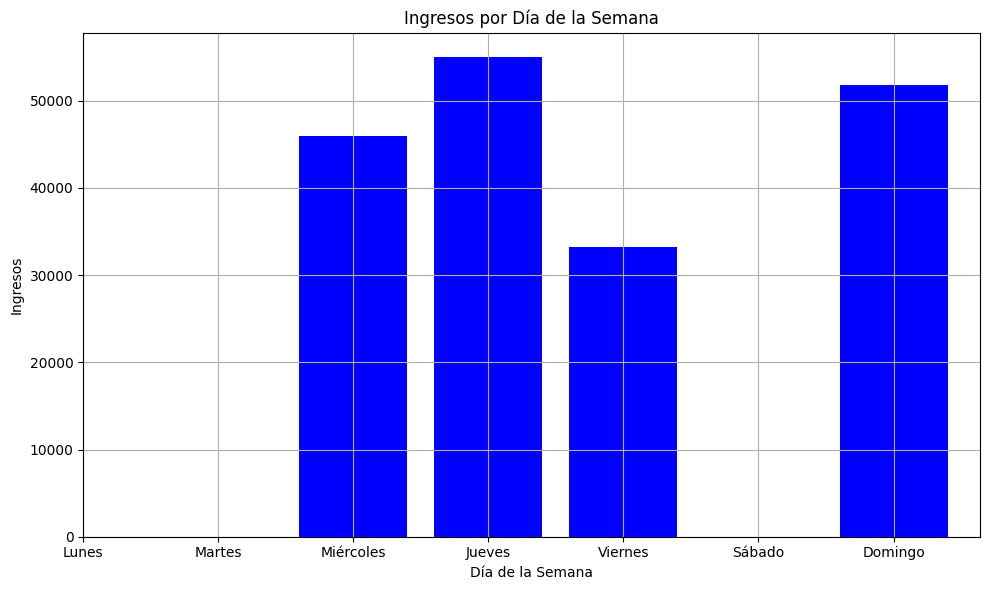

     Product  DayOfWeek     Demand  Competitor  Original_Price  \
0      10002          2   5.000000    1.395000        0.850000   
1      10002          4   5.000000   11.020000        0.850000   
2      10002          6   5.000000   11.020000        0.850000   
3      10120          4   5.000000   10.560000        0.210000   
4     10123C          4   5.000000   11.020000        0.650000   
...      ...        ...        ...         ...             ...   
3653       M          6   5.000000    1.384667        0.673333   
3654    POST          2   7.719837   10.424448       17.000000   
3655    POST          3   7.720649   11.344179       18.000000   
3656    POST          4  25.984001   11.596383       22.666667   
3657    POST          6  35.272224   11.960031       18.000000   

      Optimized_Price    Ingresos  
0            1.533636    7.668182  
1           10.015455   50.077273  
2           10.015455   50.077273  
3            9.594727   47.973636  
4           10.011818   50.

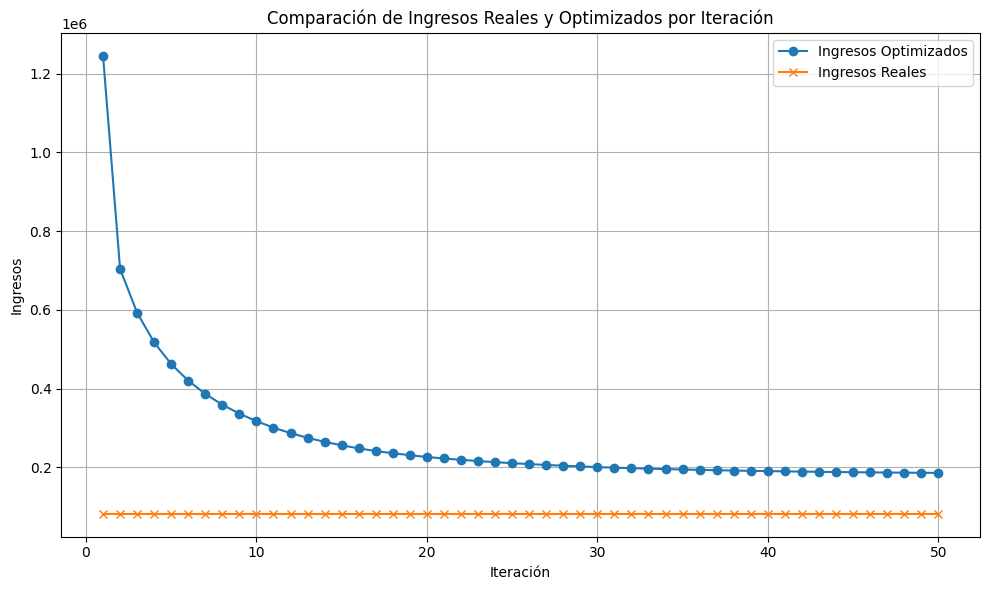

In [7]:
#import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import linprog
import numpy as np

# Load the DataFrame
df = pd.read_csv("data-2 - copia.csv").dropna()

# Preprocess DataFrame
grouped = df.groupby('StockCode').agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).reset_index()
grouped.columns = ['Product', 'Demand', 'Price']

# Adding day-based features to the dataset
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Aggregate data by StockCode and day of the week
grouped_by_day = df.groupby(['StockCode', 'DayOfWeek']).agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'IsWeekend': 'mean'
}).reset_index()

grouped_by_day.columns = ['Product', 'DayOfWeek', 'Demand', 'Price', 'IsWeekend']

# Track results for each day and product

# Add cost and competitor price
base_prices_day = grouped_by_day['Price'].values
base_demand_day = grouped_by_day['Demand'].values
grouped_by_day['Cost'] = grouped_by_day['Price'] * 0.2
grouped_by_day['Competitor'] = np.maximum(grouped_by_day['Demand'] * 0.02 + 10, grouped_by_day['Cost'] + 1.5)

# Adjusting parameters for daily pricing
iterations = 50  # Allow more iterations for thorough adjustments
alpha = 0.1
epsilon = 0.02  # Further reduced for stability
beta = 0.005  # Further reduced for competitor adjustment damping

# Track results for each day and product
results_daily = []
ingresos_per_iteration_daily = []

# Convergence threshold
convergence_threshold = 1e-4  # Stricter threshold for convergence
previous_ingresos = 0

for iteration in range(iterations):
    grouped_by_day['Competitor'] = np.maximum(grouped_by_day['Competitor'], grouped_by_day['Cost'] + 1.5)
    D = grouped_by_day['Demand'].values
    C = grouped_by_day['Competitor'].values
    X = grouped_by_day['Cost'].values
    c = -D  # Negative demand to maximize revenue

    # Constraints for linear programming
    A_ub = [[1 if j == i else 0 for j in range(len(D))] for i in range(len(D))]
    b_ub = list(C)
    A_ub += [[-1 if j == i else 0 for j in range(len(D))] for i in range(len(D))]
    b_ub += [-X[i] for i in range(len(X))]
    A_ub += [[1 + alpha if j == i else 0 for j in range(len(D))] for i in range(len(D))]
    b_ub += list(np.maximum(C + alpha * X, X + 0.1))

    # Bounds for prices
    bounds = [(X[i] + 0.1, C[i] + 10) for i in range(len(D))]

    # Linear programming optimization
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')
    if result.success:
        grouped_by_day['Optimized_Price'] = result.x
        results_daily.append(grouped_by_day[['Product', 'DayOfWeek', 'Demand', 'Competitor', 'Optimized_Price']].copy())

        # Calculate revenue
        grouped_by_day['Ingresos'] = grouped_by_day['Demand'] * grouped_by_day['Optimized_Price']
        ingresos = grouped_by_day['Ingresos'].sum()
        ingresos_per_iteration_daily.append(ingresos)

        # Check for convergence
        if abs(ingresos - previous_ingresos) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1} with ingresos: {ingresos:.2f}")
            break
        previous_ingresos = ingresos

        print(f"Ingressos at iteration {iteration + 1}: {ingresos:.2f}")

        # Update demand and competitor prices with stronger damping
        grouped_by_day['Demand'] = np.maximum(
            grouped_by_day['Demand'] * (
                1 - epsilon * (grouped_by_day['Optimized_Price'] - base_prices_day) / base_prices_day
            ),
            5
        )
        grouped_by_day['Competitor'] += beta * (grouped_by_day['Demand'] - base_demand_day)
    else:
        print(f"Optimization failed at iteration {iteration + 1}")
        break



# Add original price to the final DataFrame
grouped_by_day['Original_Price'] = base_prices_day

# Save the final DataFrame to a CSV file
grouped_by_day.to_csv("optimized_prices_daily.csv", index=False)

# Display final optimized results for daily pricing
print(grouped_by_day[['Product', 'DayOfWeek', 'Demand', 'Competitor', 'Original_Price', 'Optimized_Price', 'Ingresos']])
# Calcular ingresos reales y optimizados
grouped_by_day['Ingresos_Reales'] = grouped_by_day['Demand'] * grouped_by_day['Original_Price']
grouped_by_day['Ingresos_Optimizados'] = grouped_by_day['Demand'] * grouped_by_day['Optimized_Price']

# Calcular ingresos reales y optimizados por iteración
# Calcular ingresos reales y optimizados por iteración
# Calcular ingresos reales y optimizados por iteración

# Calcular ingresos reales por iteración
ingresos_reales_per_iteration = [grouped_by_day['Demand'].sum() * grouped_by_day['Price'].mean()] * len(results_daily)

# Plot ingresos reales y optimizados por iteración
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ingresos_per_iteration_daily) + 1), ingresos_per_iteration_daily, label='Ingresos Optimizados', marker='o')
plt.plot(range(1, len(ingresos_reales_per_iteration) + 1), ingresos_reales_per_iteration, label='Ingresos Reales', marker='x')
plt.title("Comparación de Ingresos Reales y Optimizados por Iteración")
plt.xlabel("Iteración")
plt.ylabel("Ingresos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

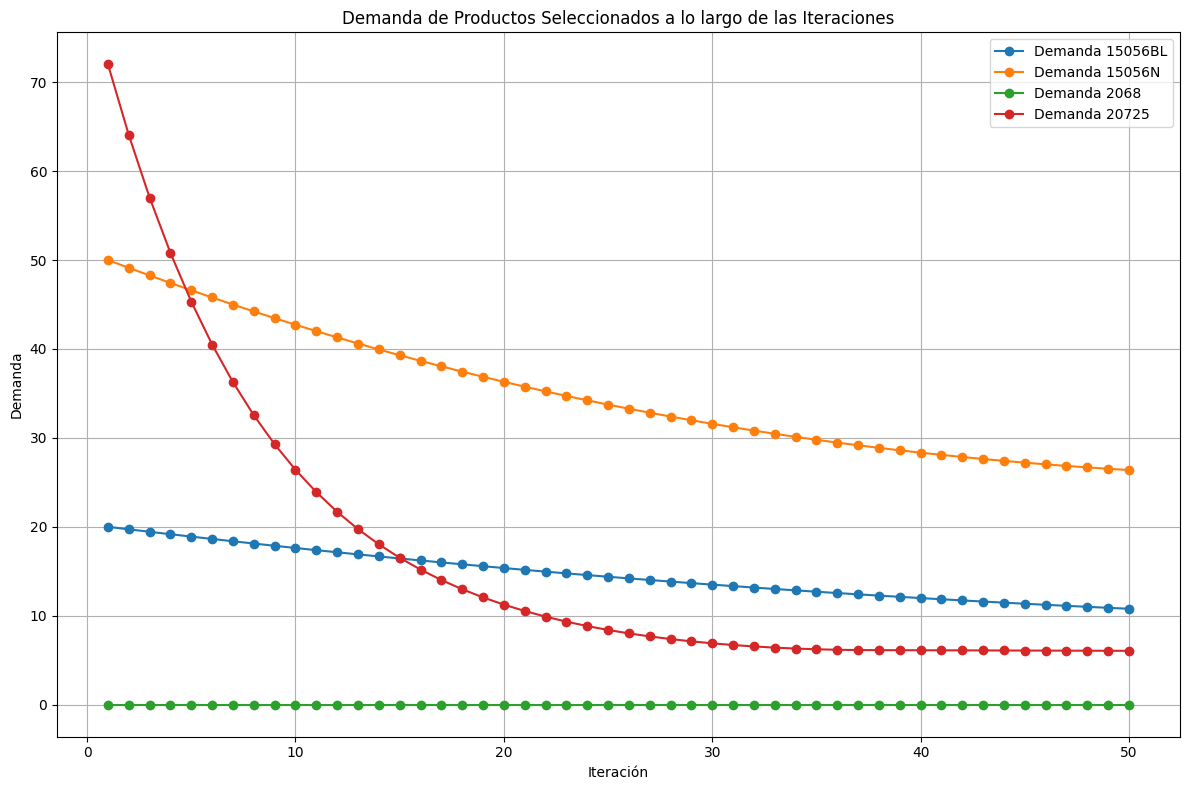

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de productos a analizar
Productlist = ["15056BL", "15056N", "2068", "20725"]

# Crear un DataFrame para almacenar la demanda por iteración
demanda_por_iteracion = pd.DataFrame()

for producto in Productlist:
    demanda_producto = []
    for result in results_daily:
        filtered_result = result[result['Product'] == producto]
        if not filtered_result.empty:
            demanda_producto.append(filtered_result['Demand'].values[0])
        else:
            demanda_producto.append(0)  # O cualquier valor por defecto que consideres adecuado
    demanda_por_iteracion[producto] = demanda_producto

# Graficar la demanda de los productos seleccionados
plt.figure(figsize=(12, 8))
for producto in Productlist:
    plt.plot(range(1, len(demanda_por_iteracion) + 1), demanda_por_iteracion[producto], label=f'Demanda {producto}', marker='o')

plt.title('Demanda de Productos Seleccionados a lo largo de las Iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Demanda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()